In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
carset_train = pd.read_csv("Training_Data_Set.csv")


carset_test = pd.read_csv("Test_Data_Set.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Training_Data_Set.csv'

In [4]:
carset_test

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,16611,skoda,octavia,Mumbai,149976.0,First,2011,8,1968,103.0,NaN,8,man,4,5,diesel
5611,16612,skoda,superb,Ahmedabad,332000.0,First,2005,14,1896,96.0,NaN,6,man,4,5,diesel
5612,16613,skoda,octavia,Bangalore,230800.0,Second,2005,14,1896,77.0,NaN,7,man,5,5,diesel
5613,16614,nissan,qashqai,Jaipur,63480.0,Third,2011,8,1997,104.0,NaN,5,man,4,7,petrol


In [5]:
# encoding "Fuel_Type" Column
carset_train.replace({'fuel_type':{'diesel':0,'petrol':1}},inplace=True)
carset_test.replace({'fuel_type':{'diesel':0,'petrol':1}},inplace=True)

# encoding "Transmission" Column
carset_train.replace({'transmission':{'man':0,'auto':1}},inplace=True)
carset_test.replace({'transmission':{'man':0,'auto':1}},inplace=True)

# encoding "Owner Type" Column
carset_train.replace({'Owner Type':{'First':0,'Second':1,'Third':2,'Fourth & Above':3}},inplace=True)
carset_test.replace({'Owner Type':{'First':0,'Second':1,'Third':2,'Fourth & Above':3}},inplace=True)

# Split columns based on above values
carset_train = pd.get_dummies(carset_train, columns=['fuel_type','transmission','Owner Type'])
carset_test = pd.get_dummies(carset_test, columns=['fuel_type','transmission','Owner Type'])

In [6]:
carset_train

,Id,Maker,model,Location,Distance,manufacture_year,Age of car,engine_displacement,engine_power,body_type,...,seat_count,Price,fuel_type_0,fuel_type_1,transmission_0,transmission_1,Owner Type_0,Owner Type_1,Owner Type_2,Owner Type_3
0,25001,skoda,octavia,Ahmedabad,NaN,1964,55,1964,147.0,compact,...,None,543764.25,0,1,1,0,0,1,0,0
1,25002,fiat,panda,Ahmedabad,27750.0,2012,7,1242,51.0,NaN,...,4,401819.25,0,1,1,0,0,0,1,0
2,25003,bmw,x1,Hyderabad,46000.0,2014,5,1995,105.0,NaN,...,5,2392855.50,1,0,0,1,0,0,1,0
3,25004,nissan,juke,Mumbai,43949.0,2011,8,1618,140.0,NaN,...,5,958606.50,0,1,1,0,0,0,1,0
4,25005,bmw,x5,Jaipur,59524.0,2012,7,2993,180.0,NaN,...,5,3085561.50,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,skoda,octavia,Delhi,29334.0,2014,5,1598,77.0,NaN,...,5,1342996.50,1,0,1,0,0,0,0,1
53511,78512,skoda,octavia,Bangalore,223631.0,2009,10,1900,77.0,NaN,...,5,510732.75,1,0,1,0,0,0,0,1
53512,78513,bmw,x1,Pune,25500.0,2015,4,1995,105.0,NaN,...,5,2008123.50,1,0,0,1,0,0,1,0
53513,78514,toyota,avensis,Jaipur,1195500.0,2011,8,11950,93.0,compact,...,None,874352.25,1,0,1,0,0,0,1,0


In [7]:
# Delete body_type col
carset_train = carset_train.drop("body_type", axis=1)
carset_train

carset_test = carset_test.drop("body_type", axis=1)
carset_test

,Id,Maker,model,Location,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,fuel_type_0,fuel_type_1,transmission_0,transmission_1,Owner Type_0,Owner Type_1,Owner Type_2,Owner Type_3
0,11001,skoda,octavia,Mumbai,150000.0,2007,12,1595,75.0,5,4,5,0,1,1,0,1,0,0,0
1,11002,skoda,rapid,Coimbatore,29376.0,2014,5,1598,77.0,4,4,5,1,0,1,0,0,0,1,0
2,11003,skoda,octavia,Coimbatore,30563.0,2014,5,1968,110.0,5,5,5,1,0,1,0,0,1,0,0
3,11004,audi,q3,Delhi,8650.0,2015,4,1968,110.0,8,4,5,1,0,0,1,0,0,0,1
4,11005,audi,tt,Chennai,6400.0,2015,4,1984,169.0,4,2,None,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,16611,skoda,octavia,Mumbai,149976.0,2011,8,1968,103.0,8,4,5,1,0,1,0,1,0,0,0
5611,16612,skoda,superb,Ahmedabad,332000.0,2005,14,1896,96.0,6,4,5,1,0,1,0,1,0,0,0
5612,16613,skoda,octavia,Bangalore,230800.0,2005,14,1896,77.0,7,5,5,1,0,1,0,0,1,0,0
5613,16614,nissan,qashqai,Jaipur,63480.0,2011,8,1997,104.0,5,4,7,0,1,1,0,0,0,1,0


In [10]:
#Assign values to Maker col
maker = carset_train["Maker"].unique()
i=0
makdict = {}
for m in maker:
    makdict[m] = i
    i=i+1
makdict

{'skoda': 0,
 'fiat': 1,
 'bmw': 2,
 'nissan': 3,
 'audi': 4,
 'toyota': 5,
 'hyundai': 6,
 'maserati': 7}

In [11]:
#Assign values to model col
model = carset_train["model"].unique()
i=0
modict = {}
for m in model:
    modict[m] = i
    i=i+1
modict

{'octavia': 0,
 'panda': 1,
 'x1': 2,
 'juke': 3,
 'x5': 4,
 'superb': 5,
 'qashqai': 6,
 'coupe': 7,
 'micra': 8,
 'aygo': 9,
 'yeti': 10,
 'auris': 11,
 'q3': 12,
 'q5': 13,
 'x3': 14,
 'avensis': 15,
 'i30': 16,
 'q7': 17,
 'tt': 18,
 'citigo': 19,
 'yaris': 20,
 'roomster': 21,
 'rapid': 22}

In [12]:
#Assign values to Location col
location = carset_train["Location"].unique()
i=0
locdict = {}
for m in location:
    locdict[m] = i
    i=i+1
locdict

{'Ahmedabad': 0,
 'Hyderabad': 1,
 'Mumbai': 2,
 'Jaipur': 3,
 'Chennai': 4,
 'Coimbatore': 5,
 'Kochi': 6,
 'Bangalore': 7,
 'Pune': 8,
 'Kolkata': 9,
 'Delhi': 10}

In [14]:
#Replace with values and split columns
carset_train.replace({'Maker':makdict},inplace=True)
carset_train.replace({'model':modict},inplace=True)
carset_train.replace({'Location':locdict},inplace=True)
carset_train = pd.get_dummies(carset_train, columns=['Maker','model','Location'])

carset_test.replace({'Maker':makdict},inplace=True)
carset_test.replace({'model':modict},inplace=True)
carset_test.replace({'Location':locdict},inplace=True)
carset_test = pd.get_dummies(carset_test, columns=['Maker','model','Location'])

In [19]:
carset_test

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,fuel_type_0,...,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9,Location_10
0,11001,150000.0,2007,12,1595,75.0,5,4,5,0,...,0,1,0,0,0,0,0,0,0,0
1,11002,29376.0,2014,5,1598,77.0,4,4,5,1,...,0,0,0,0,1,0,0,0,0,0
2,11003,30563.0,2014,5,1968,110.0,5,5,5,1,...,0,0,0,0,1,0,0,0,0,0
3,11004,8650.0,2015,4,1968,110.0,8,4,5,1,...,0,0,0,0,0,0,0,0,0,1
4,11005,6400.0,2015,4,1984,169.0,4,2,NaN,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,16611,149976.0,2011,8,1968,103.0,8,4,5,1,...,0,1,0,0,0,0,0,0,0,0
5611,16612,332000.0,2005,14,1896,96.0,6,4,5,1,...,0,0,0,0,0,0,0,0,0,0
5612,16613,230800.0,2005,14,1896,77.0,7,5,5,1,...,0,0,0,0,0,0,1,0,0,0
5613,16614,63480.0,2011,8,1997,104.0,5,4,7,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
#Replace None values with Nan
temp = pd.DataFrame(carset_train.seat_count.str.isdigit())
mask = temp['seat_count'] == False
carset_train.loc[mask, 'seat_count'] = np.nan

temp = pd.DataFrame(carset_train.door_count.str.isdigit())
mask = temp['door_count'] == False
carset_train.loc[mask, 'door_count'] = np.nan

temp = pd.DataFrame(carset_test.seat_count.str.isdigit())
mask = temp['seat_count'] == False
carset_test.loc[mask, 'seat_count'] = np.nan

temp = pd.DataFrame(carset_test.door_count.str.isdigit())
mask = temp['door_count'] == False
carset_test.loc[mask, 'door_count'] = np.nan

In [20]:
carset_train

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,...,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9,Location_10
0,25001,NaN,1964,55,1964,147.0,8,NaN,NaN,543764.25,...,0,0,0,0,0,0,0,0,0,0
1,25002,27750.0,2012,7,1242,51.0,6,4,4,401819.25,...,0,0,0,0,0,0,0,0,0,0
2,25003,46000.0,2014,5,1995,105.0,7,4,5,2392855.50,...,1,0,0,0,0,0,0,0,0,0
3,25004,43949.0,2011,8,1618,140.0,7,4,5,958606.50,...,0,1,0,0,0,0,0,0,0,0
4,25005,59524.0,2012,7,2993,180.0,7,4,5,3085561.50,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,29334.0,2014,5,1598,77.0,4,4,5,1342996.50,...,0,0,0,0,0,0,0,0,0,1
53511,78512,223631.0,2009,10,1900,77.0,8,5,5,510732.75,...,0,0,0,0,0,0,1,0,0,0
53512,78513,25500.0,2015,4,1995,105.0,4,4,5,2008123.50,...,0,0,0,0,0,0,0,1,0,0
53513,78514,1195500.0,2011,8,11950,93.0,5,NaN,NaN,874352.25,...,0,0,1,0,0,0,0,0,0,0


In [21]:
#Replace Nan values with col median
carset_train = carset_train.apply(lambda x: x.fillna(x.median()),axis=0)

carset_test = carset_test.apply(lambda x: x.fillna(x.median()),axis=0)

In [22]:
carset_train

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,...,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9,Location_10
0,25001,65520.0,1964,55,1964,147.0,8,4.0,5.0,543764.25,...,0,0,0,0,0,0,0,0,0,0
1,25002,27750.0,2012,7,1242,51.0,6,4,4,401819.25,...,0,0,0,0,0,0,0,0,0,0
2,25003,46000.0,2014,5,1995,105.0,7,4,5,2392855.50,...,1,0,0,0,0,0,0,0,0,0
3,25004,43949.0,2011,8,1618,140.0,7,4,5,958606.50,...,0,1,0,0,0,0,0,0,0,0
4,25005,59524.0,2012,7,2993,180.0,7,4,5,3085561.50,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,29334.0,2014,5,1598,77.0,4,4,5,1342996.50,...,0,0,0,0,0,0,0,0,0,1
53511,78512,223631.0,2009,10,1900,77.0,8,5,5,510732.75,...,0,0,0,0,0,0,1,0,0,0
53512,78513,25500.0,2015,4,1995,105.0,4,4,5,2008123.50,...,0,0,0,0,0,0,0,1,0,0
53513,78514,1195500.0,2011,8,11950,93.0,5,4.0,5.0,874352.25,...,0,0,1,0,0,0,0,0,0,0


In [23]:
# Type cast col
carset_train["door_count"] = carset_train["door_count"].astype("int64")
carset_train["seat_count"] = carset_train["seat_count"].astype("int64")

carset_test["door_count"] = carset_test["door_count"].astype("int64")
carset_test["seat_count"] = carset_test["seat_count"].astype("int64")

In [24]:
carset_train

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,...,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9,Location_10
0,25001,65520.0,1964,55,1964,147.0,8,4,5,543764.25,...,0,0,0,0,0,0,0,0,0,0
1,25002,27750.0,2012,7,1242,51.0,6,4,4,401819.25,...,0,0,0,0,0,0,0,0,0,0
2,25003,46000.0,2014,5,1995,105.0,7,4,5,2392855.50,...,1,0,0,0,0,0,0,0,0,0
3,25004,43949.0,2011,8,1618,140.0,7,4,5,958606.50,...,0,1,0,0,0,0,0,0,0,0
4,25005,59524.0,2012,7,2993,180.0,7,4,5,3085561.50,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,29334.0,2014,5,1598,77.0,4,4,5,1342996.50,...,0,0,0,0,0,0,0,0,0,1
53511,78512,223631.0,2009,10,1900,77.0,8,5,5,510732.75,...,0,0,0,0,0,0,1,0,0,0
53512,78513,25500.0,2015,4,1995,105.0,4,4,5,2008123.50,...,0,0,0,0,0,0,0,1,0,0
53513,78514,1195500.0,2011,8,11950,93.0,5,4,5,874352.25,...,0,0,1,0,0,0,0,0,0,0


In [25]:
carset_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,53515.0,5.175800e+04,15448.594165,25001.0,38379.50,51758.00,65136.500,78515.00
Distance,53515.0,9.388942e+04,272460.148644,0.0,16507.00,65520.00,133304.000,9899800.00
manufacture_year,53515.0,2.010408e+03,4.650322,1934.0,2008.00,2011.00,2014.000,2016.00
Age of car,53515.0,8.591890e+00,4.650322,3.0,5.00,8.00,11.000,85.00
engine_displacement,53515.0,1.904049e+03,1496.564596,14.0,1395.00,1896.00,1995.000,32000.00
engine_power,53515.0,1.001943e+02,44.743107,10.0,74.00,91.00,125.000,896.00
Vroom Audit Rating,53515.0,5.998374e+00,1.418336,4.0,5.00,6.00,7.000,8.00
door_count,53515.0,3.976810e+00,0.686609,1.0,4.00,4.00,4.000,6.00
seat_count,53515.0,4.904214e+00,0.519187,1.0,5.00,5.00,5.000,9.00
Price,53515.0,1.098084e+06,844156.530729,3.0,505181.25,885455.25,1477828.875,22120775.25


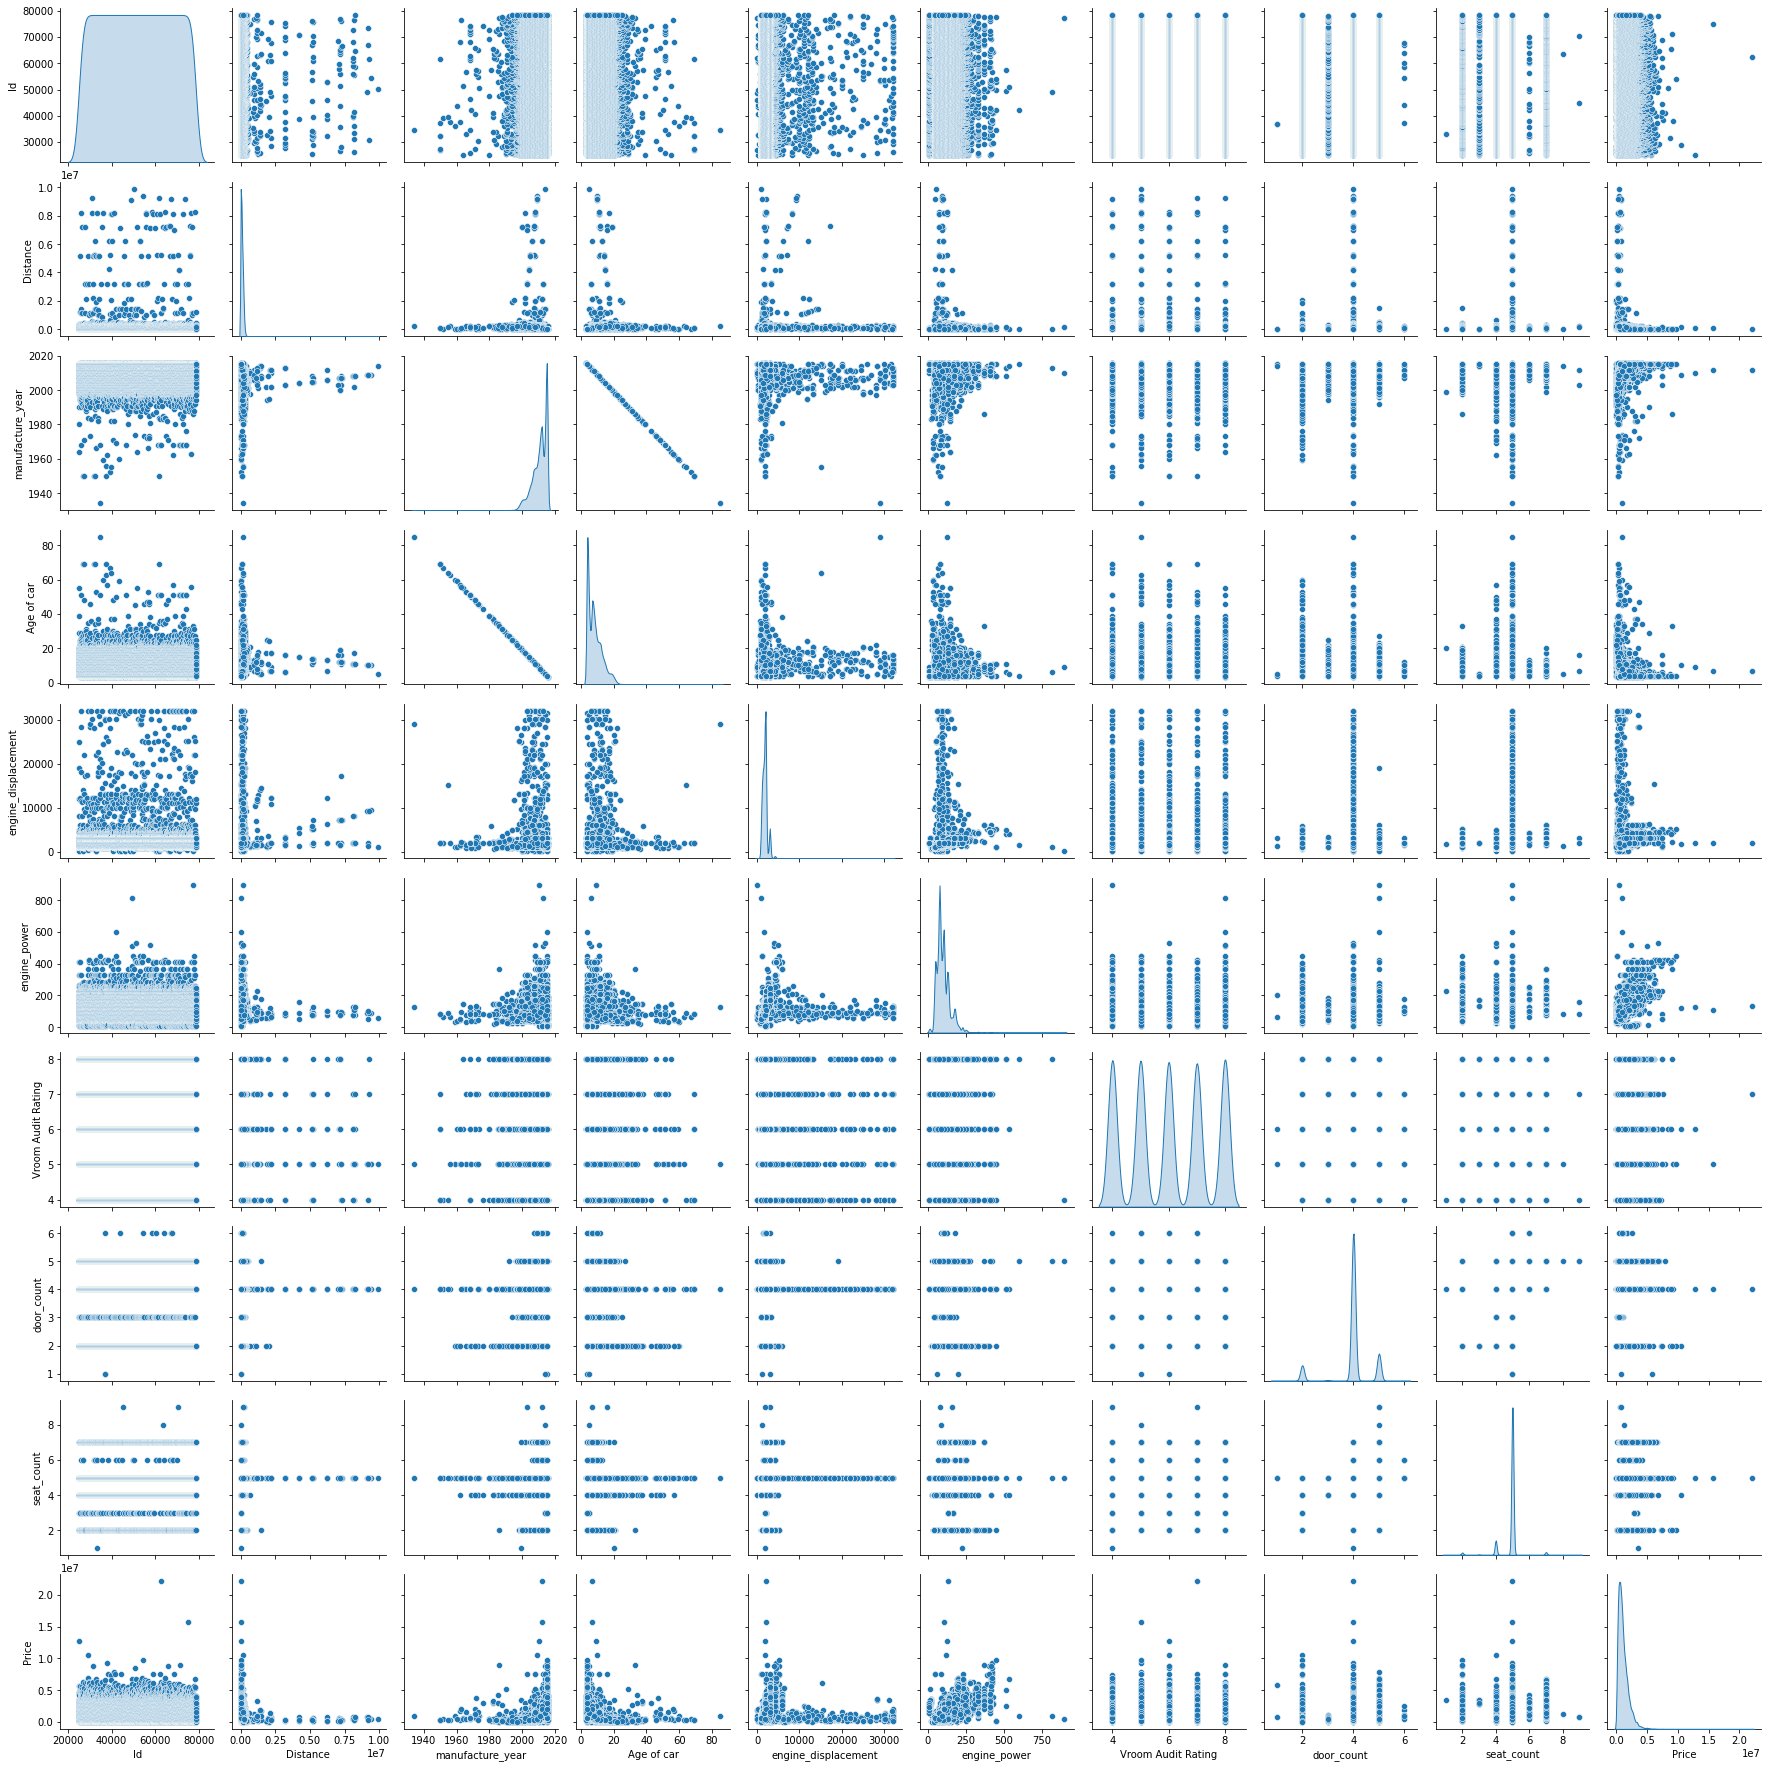

In [19]:
# Plot dataset to observe trends
carset_attr = carset_train.iloc[:, 0:10]

sns.pairplot(carset_attr, diag_kind='kde')

In [32]:
#Separate target column
X = carset_train.drop('Price', axis=1)
y = carset_train[['Price']]
XT = carset_test

In [50]:
XT

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,fuel_type_0,...,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9,Location_10,Price
0,11001,150000.0,2007,12,1595,75.0,5,4,5,0,...,1,0,0,0,0,0,0,0,0,4.500577e+05
1,11002,29376.0,2014,5,1598,77.0,4,4,5,1,...,0,0,0,1,0,0,0,0,0,1.026502e+06
2,11003,30563.0,2014,5,1968,110.0,5,5,5,1,...,0,0,0,1,0,0,0,0,0,1.315627e+06
3,11004,8650.0,2015,4,1968,110.0,8,4,5,1,...,0,0,0,0,0,0,0,0,1,2.518114e+06
4,11005,6400.0,2015,4,1984,169.0,4,2,5,0,...,0,0,1,0,0,0,0,0,0,2.856598e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,16611,149976.0,2011,8,1968,103.0,8,4,5,1,...,1,0,0,0,0,0,0,0,0,9.138255e+05
5611,16612,332000.0,2005,14,1896,96.0,6,4,5,1,...,0,0,0,0,0,0,0,0,0,2.744139e+05
5612,16613,230800.0,2005,14,1896,77.0,7,5,5,1,...,0,0,0,0,0,1,0,0,0,2.708804e+05
5613,16614,63480.0,2011,8,1997,104.0,5,4,7,0,...,0,1,0,0,0,0,0,0,0,1.091430e+06


In [36]:
#Create LR model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))
regression_model.score(X_test, y_test)

The coefficient for Id is -0.034894413036819796
The coefficient for Distance  is -0.16726913675989952
The coefficient for manufacture_year is 42830.06791464901
The coefficient for Age of car is -42830.06790708481
The coefficient for engine_displacement is -6.021116717343375
The coefficient for engine_power is 4211.8855501296275
The coefficient for Vroom Audit Rating is 730.2808196699225
The coefficient for door_count is -71566.91895200324
The coefficient for seat_count is 34879.34290887859
The coefficient for fuel_type_0 is 23041.974562634343
The coefficient for fuel_type_1 is -23041.974562627147
The coefficient for transmission_0 is -104162.00884206787
The coefficient for transmission_1 is 104162.00884207453
The coefficient for Owner Type_0 is 9522.727223472946
The coefficient for Owner Type_1 is -209.8363243204658
The coefficient for Owner Type_2 is -2931.6206825335976
The coefficient for Owner Type_3 is -6381.270216644611
The coefficient for Maker_0 is -296598.7543883177
The coeffic

0.7435439635082071

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

polynomial = PolynomialFeatures(degree=2, interaction_only=True)

X_train_p = polynomial.fit_transform(X_train)

X_test_p = polynomial.fit_transform(X_test)

poly_lm = linear_model.LinearRegression()

poly_lm.fit(X_train_p, y_train)

y_predict = poly_lm.predict(X_test_p)



print(poly_lm.score(X_test_p, y_test))


0.8851473774845106


In [39]:
XT_test = XT

XT_test_p = polynomial.fit_transform(XT_test)

y_predict_test = poly_lm.predict(XT_test_p)

y_predict_test

array([[ 450057.72073078],
       [1026502.23202658],
       [1315627.14140606],
       ...,
       [ 270880.42391014],
       [1091429.80955887],
       [ 602754.31243467]])

In [40]:
carset_test['Price'] = y_predict_test

In [1]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, poly_lm.predict(X_test_p))

NameError: name 'y_test' is not defined

In [46]:
carset_test

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,fuel_type_0,...,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9,Location_10,Price
0,11001,150000.0,2007,12,1595,75.0,5,4,5,0,...,1,0,0,0,0,0,0,0,0,4.500577e+05
1,11002,29376.0,2014,5,1598,77.0,4,4,5,1,...,0,0,0,1,0,0,0,0,0,1.026502e+06
2,11003,30563.0,2014,5,1968,110.0,5,5,5,1,...,0,0,0,1,0,0,0,0,0,1.315627e+06
3,11004,8650.0,2015,4,1968,110.0,8,4,5,1,...,0,0,0,0,0,0,0,0,1,2.518114e+06
4,11005,6400.0,2015,4,1984,169.0,4,2,5,0,...,0,0,1,0,0,0,0,0,0,2.856598e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,16611,149976.0,2011,8,1968,103.0,8,4,5,1,...,1,0,0,0,0,0,0,0,0,9.138255e+05
5611,16612,332000.0,2005,14,1896,96.0,6,4,5,1,...,0,0,0,0,0,0,0,0,0,2.744139e+05
5612,16613,230800.0,2005,14,1896,77.0,7,5,5,1,...,0,0,0,0,0,1,0,0,0,2.708804e+05
5613,16614,63480.0,2011,8,1997,104.0,5,4,7,0,...,0,1,0,0,0,0,0,0,0,1.091430e+06


In [47]:
final = carset_test[['Id','Price']]

In [48]:
final

,Id,Price
0,11001,4.500577e+05
1,11002,1.026502e+06
2,11003,1.315627e+06
3,11004,2.518114e+06
4,11005,2.856598e+06
...,...,...
5610,16611,9.138255e+05
5611,16612,2.744139e+05
5612,16613,2.708804e+05
5613,16614,1.091430e+06


In [53]:
final.to_csv('final.csv')